In [1]:
import pandas as pd
import numpy as np

## Reindexing

用一个叫reindex的function

In [2]:
#先创建一个series
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [3]:
obj2 = obj.reindex(list('abcde')) #改index
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

问题来了，像上面这种缺了一个咋办

In [5]:
obj2 = obj.reindex(list('abcde'), method='ffill') 
#这个ffill=forward fill就是把后面空的东西补上了
obj2

ValueError: ignored

上面这种是经典的错误，index必须是数字才可以用method ffill

In [8]:
#创建个series
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [10]:
obj3.reindex(range(6), method='ffill')#可以看到补充的index forward了前面的value

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

dataframe的reindex也是类似的，只不过你可以specify是index还是columns

In [11]:
#创建个
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
     index=['a', 'c', 'd'],
     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [12]:
frame2 = frame.reindex(list('abcde'))
frame2
#可以看到如果不specify的话，reindex是默认为re index的（axis=0)

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0
e,NaN,NaN,NaN


In [14]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


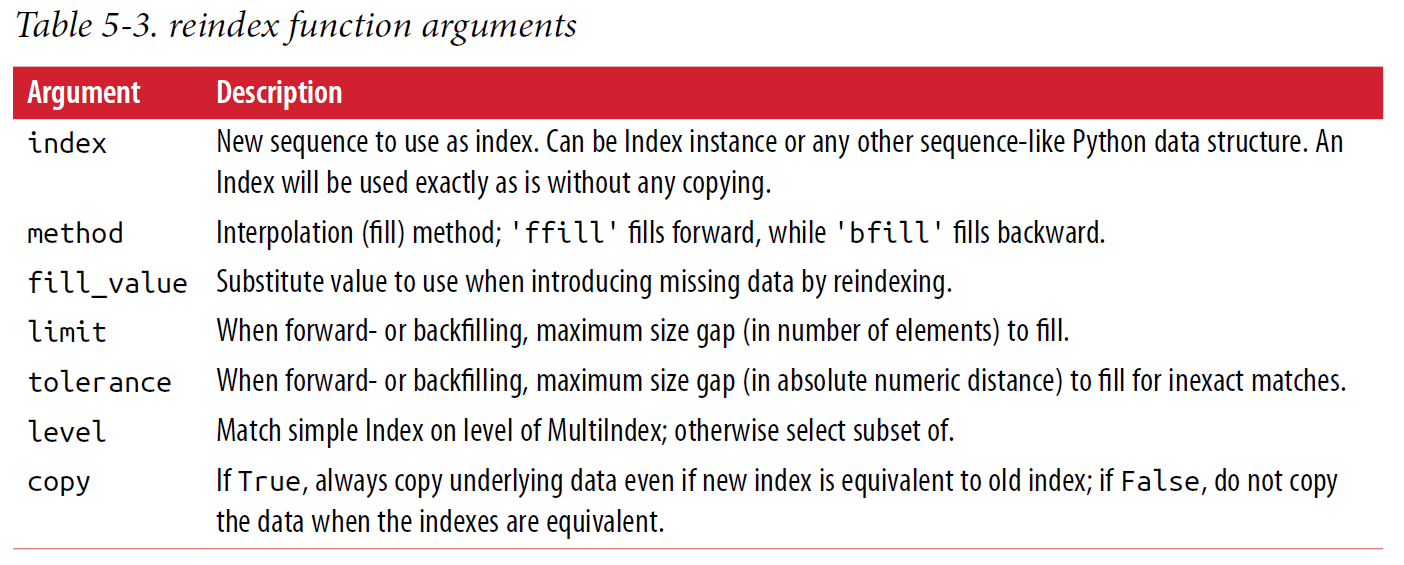

## Dropping Entries from an Axis

In [15]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [18]:
obj = obj.drop(['a', 'e']) #用drop function去掉
obj

b    1.0
c    2.0
d    3.0
dtype: float64

In [19]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [20]:
#同样的，drop如果没有specify，是drop row的
data.drop(['Ohio', 'Colorado'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [21]:
data.drop(['one','three'], axis=1) #或者axis='columns'

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [22]:
data.drop('Utah', inplace=True) #很多时候modify df不会直接影响到df，但是这个Inplace=True的时候就会了
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


## Indexing, Seletion, and Filtering

pandas的indexing和numpy的非常相似，但是有一点不一样的是，**the end point is inclusive!!**
比如[2:5]在np和python里面5是不包含在内的，而pandas则是包含在内

In [24]:
obj = pd.Series(np.arange(4.), index=list('abcd'))
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [25]:
obj['b':'c']#可以看到'c'是包含在内的

b    1.0
c    2.0
dtype: float64

In [26]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [27]:
#filtering
data[data['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [28]:
data<5 #生成bool

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [29]:
data[data<5] = 0 #用bool作selection的mask

In [30]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc
这里将要提到最重要的.loc和.iloc
前者是接受string的selection（label-based），后者则是integer（integer-based indexing)

In [31]:
#syntax是 df.loc[row, column]
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [32]:
#syntax是 df.iloc[row_int, column_int]
data.iloc[2, [3,0,1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

上面两个，无论是row还是column都是可以是list形式的

In [33]:
data.iloc[:, :3][data.three > 5]
#用这种方式还可以在iloc之后再加一些selection

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


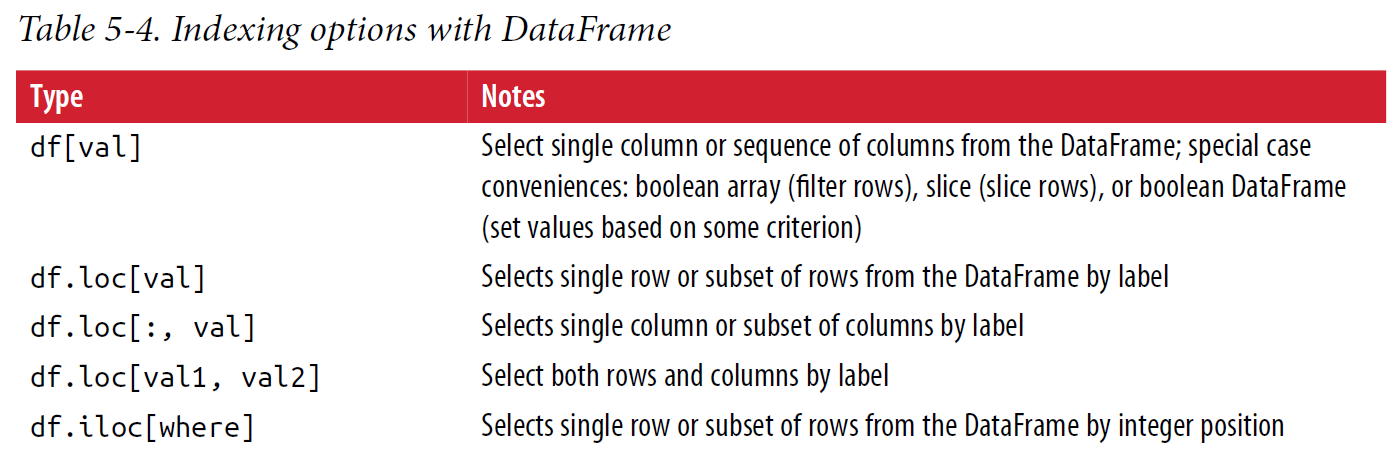

## Arithmetic and Data Alignment

两个series或者df相加，是会根据label(row & column)相同的原则来相加的，若无alignment，那么则会NaN

In [34]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [41]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                           index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                           index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [39]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [40]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [42]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### Arithmetic methods with fill values

In [38]:
df1.add(df2, fill_value=0)#这个fill_value很厉害，就是把NaN变成0
#问题来了，那为啥会有下面这几个依然是NaN?
#因为它俩是不同dimension的df，所以有一些值是两者都没有intesection的，就还是NaN

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [43]:
#下面看一个小dimension，另一个涵盖前者的大dimension就不会出现这情况
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [44]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [45]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [46]:
df1+df2 #这种情况因为df1缺少3和e，所以涉及这些row和column的都是NaN

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [47]:
df1.add(df2, fill_value=0) #把缺的NaN都变成0

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [49]:
#这个fill_value也可以在其它地方使用，例如reindex
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [50]:
#上文提及的add是相加的function，它相较于普通的+，提供了更多的option（因为是function）
df1.rdiv(1) #这个rdiv是reverse division的意思

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


a.div(b)等于a/b 

a.rdiv(b)等于b/a

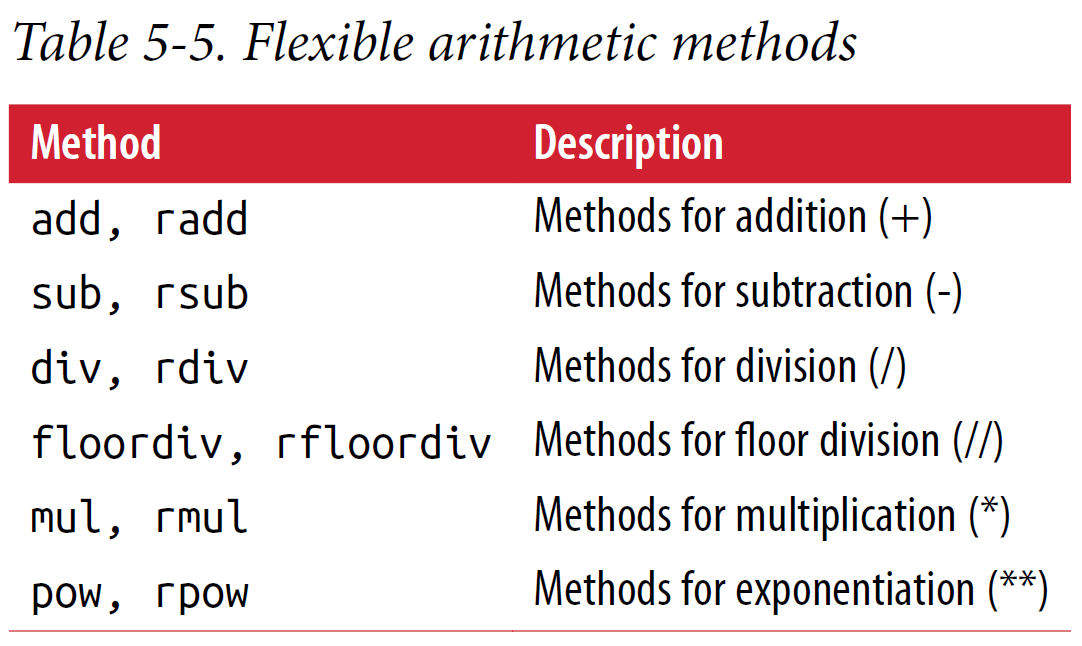

### Operations between DataFrame and Series

In [51]:
arr = np.arange(12.).reshape(3,4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [52]:
arr - arr[0] #每一row都减去第一row, 0，1，2，3

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

同理，DataFrame和Series也可以做这样；
arithmetic between DataFrame and Series matches the index of the Series on the DataFrame's columns, boradcasting down the rows
如果没有出现那个index，则会自动补上NaN

In [53]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
        columns=list('bde'),
        index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [54]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [55]:
frame - series #一样，和前面的np array一样，minus row by row

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [56]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [57]:
frame + series2 #没有出现的column，那就是有

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [63]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [64]:
frame.sub(series3, axis='index') #把frame各column都减去d column
#为啥咋是每一column的减，axis却是index

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## Function Application and Mapping
NumPy ufuncs(element-wise arrary methods) also work with pandas object

In [65]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.805457,-1.126977,0.130854
Ohio,-0.138389,-0.288940,0.608480
Texas,-0.230215,-2.390799,-0.975885
Oregon,0.991677,0.761958,-0.105457


In [66]:
np.abs(frame) #pandas的df也做element-wise

,b,d,e
Utah,1.805457,1.126977,0.130854
Ohio,0.138389,0.288940,0.608480
Texas,0.230215,2.390799,0.975885
Oregon,0.991677,0.761958,0.105457


In [67]:
#定义一个lambda function
f = lambda x: x.max() - x.min()

In [68]:
frame.apply(f) #apply lambda function到df，默认是row

b    2.035671
d    3.152757
e    1.584365
dtype: float64

In [69]:
frame.apply(f, axis='columns') #以columns为据

Utah      2.932434
Ohio      0.897421
Texas     2.160585
Oregon    1.097133
dtype: float64

**apply**是以row和column为基准的,针对dataframe

**applyma**p则是element-wise的，不考虑dataframe的row或者column，而是每个slot都要compute

**map**则是 element-wise的，针对series的

In [70]:
format = lambda x: '%.2f' % x

In [71]:
frame.applymap(format)

,b,d,e
Utah,1.81,-1.13,0.13
Ohio,-0.14,-0.29,0.61
Texas,-0.23,-2.39,-0.98
Oregon,0.99,0.76,-0.11


In [72]:
#单独的column也可以被认为是series
frame['e'].map(format)

Utah       0.13
Ohio       0.61
Texas     -0.98
Oregon    -0.11
Name: e, dtype: object

## Sorting and Ranking

In [73]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
            index=['three', 'one'],
            columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [74]:
frame.sort_index()  #默认sort index是sort row

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [75]:
frame.sort_index(axis=1) #把column来sort一下

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [77]:
frame.sort_index(axis=1, ascending=False) #默认是正序，现在可以倒序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


sort index用sort_index()， value的话用sort_values

如果是sorting的话，NaN会放到最后

In [78]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [79]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


sort_values()还可以specify是sort哪一column的value

In [80]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


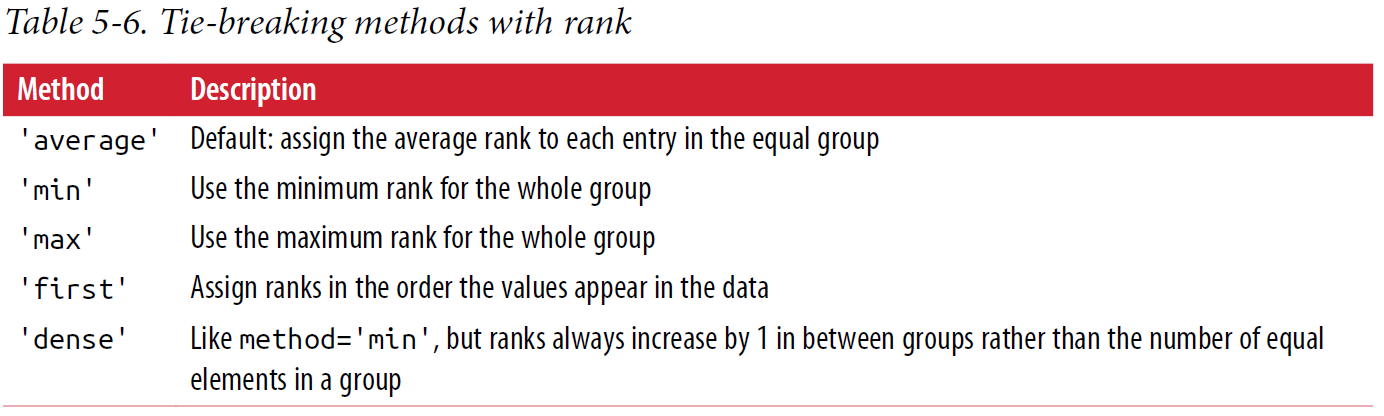

## Axis Indexes with Duplicate Labels

is_unique()可以查看这个东西是不是唯一的

In [81]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [83]:
obj.index.is_unique #上面能看到，index有重复的a和b，所以这个index不是unique的

False